In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\adems\Downloads\youtubers_df.csv")

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
#Check the structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
# Summary statistics of numerical variables
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [6]:
# Check for missing data
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

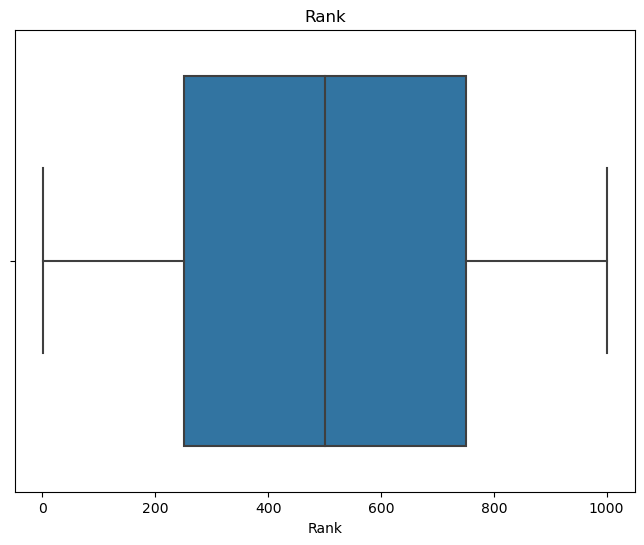

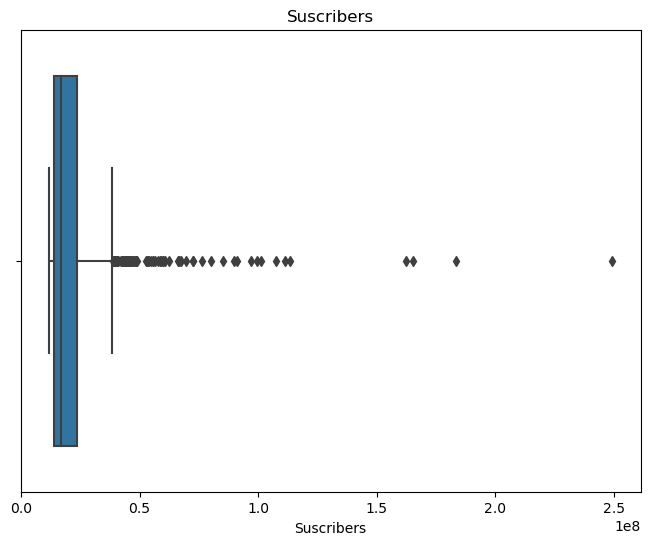

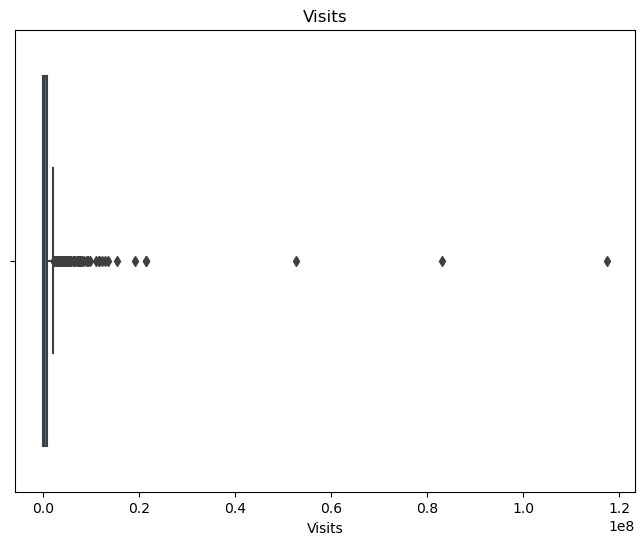

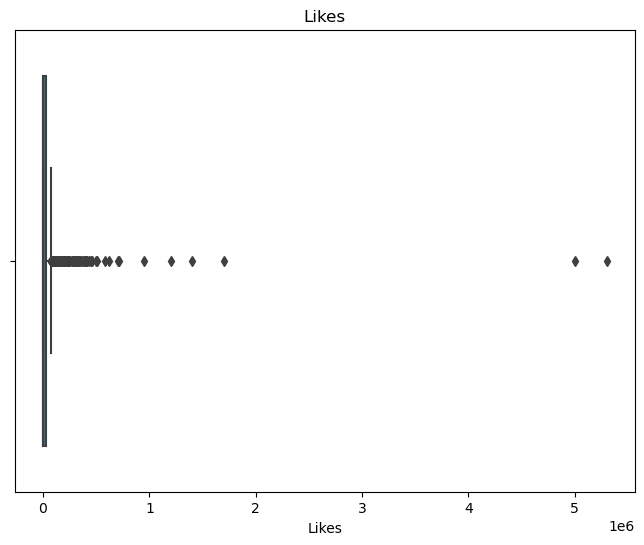

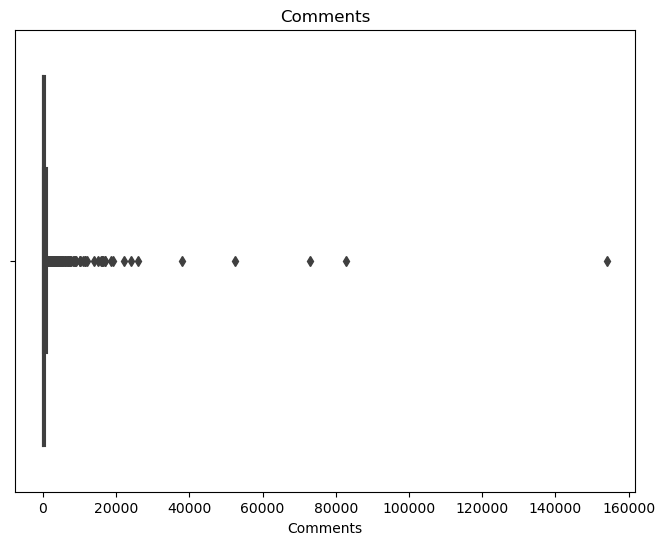

In [7]:
# Check for outliers using box plots
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [8]:
# Count occurrences of each category
category_counts = df['Categories'].value_counts()

# Display the top categories
top_categories = category_counts.head(10)
print("Top Categories:")
print(top_categories)


Top Categories:
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Name: Categories, dtype: int64


In [12]:
# Calculate correlation coefficients
corr_likes = df['Suscribers'].corr(df['Likes'])
corr_comments = df['Suscribers'].corr(df['Comments'])

print("Correlation Coefficient between Subscribers and Likes:", corr_likes)
print("Correlation Coefficient between Subscribers and Comments:", corr_comments)


Correlation Coefficient between Subscribers and Likes: 0.21163868368008348
Correlation Coefficient between Subscribers and Comments: 0.03634982616105394


In [13]:
# Distribution of streamers by country
country_distribution = df['Country'].value_counts()

# Display the top countries
top_countries = country_distribution.head(10)
print("Top Countries of Streamers:")
print(top_countries)

# Determine if there are regional preferences for specific content categories
category_country = df.groupby(['Categories', 'Country']).size().unstack().fillna(0)
print("Category Distribution by Country:")
print(category_country)


Top Countries of Streamers:
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Name: Country, dtype: int64
Category Distribution by Country:
Country                             Estados Unidos  Argentina  Brasil  México  \
Categories                                                                      
ASMR                                           1.0        0.0     0.0     0.0   
ASMR, Comida y bebida                          1.0        0.0     0.0     0.0   
Animación                                      4.0        1.0     3.0     4.0   
Animación, Humor                              17.0        0.0     2.0     2.0   
Animación, Humor, Juguetes                     0.0        0.0     0.0     0.0   
Animación, Juguetes                            1.0        0.0     0.0     0.0   
Animación, Videojuegos                    

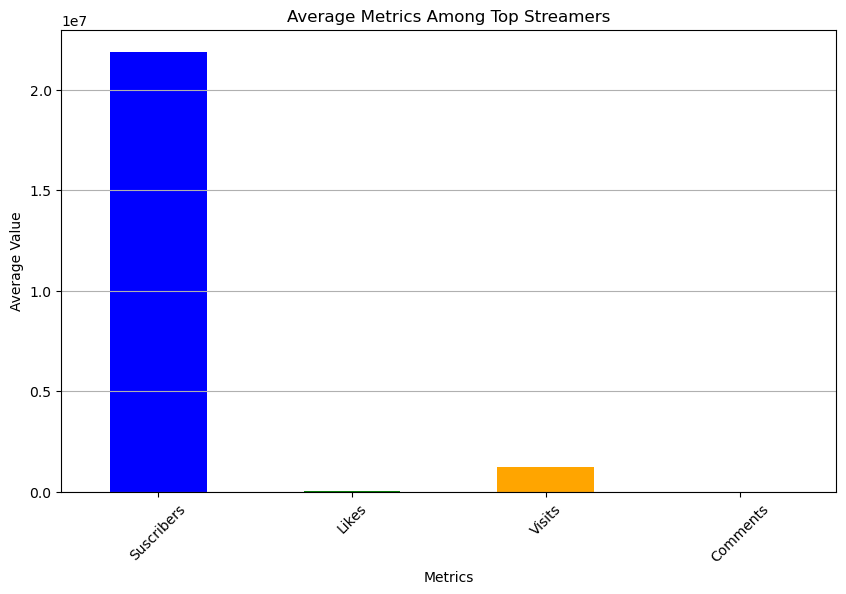

In [16]:
# Calculate average metrics
average_metrics = df[['Suscribers', 'Likes', 'Visits', 'Comments']].mean()

# Visualize average metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Average Metrics Among Top Streamers')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [18]:
# Explore distribution of content categories
category_distribution = df['Categories'].value_counts()

# Display categories with the highest number of streamers
print("Categories with the Highest Number of Streamers:")
print(category_distribution.head(10))


Categories with the Highest Number of Streamers:
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Name: Categories, dtype: int64


In [21]:
# Group by category and calculate average metrics
category_avg_metrics = df.groupby('Categories')[['Suscribers', 'Likes', 'Visits', 'Comments']].mean()

# Identify categories with exceptional performance metrics
exceptional_categories = category_avg_metrics[(category_avg_metrics > category_avg_metrics.mean()).all(axis=1)]
print("Categories with Exceptional Performance Metrics:")
print(exceptional_categories)

Categories with Exceptional Performance Metrics:
                                 Suscribers          Likes        Visits  \
Categories                                                                 
Animación, Humor               2.078519e+07  145768.333333  3.760126e+06   
Diseño/arte, DIY y Life Hacks  2.570000e+07  127300.000000  2.600000e+06   
Videojuegos                    2.498421e+07   57121.052632  1.387137e+06   
Videojuegos, Humor             2.876471e+07  420511.764706  1.023968e+07   

                                  Comments  
Categories                                  
Animación, Humor               5344.962963  
Diseño/arte, DIY y Life Hacks  2200.000000  
Videojuegos                    1760.157895  
Videojuegos, Humor             4827.058824  


In [25]:
# Calculate average performance metrics
average_performance = df[['Suscribers', 'Likes', 'Visits', 'Comments']].mean()

# Identify streamers with above-average performance
above_average_streamers = df[(df['Suscribers'] > average_performance['Suscribers']) &
                             (df['Likes'] > average_performance['Likes']) &
                             (df['Visits'] > average_performance['Visits']) &
                             (df['Comments'] > average_performance['Comments'])]

print("Streamers with Above Average Performance Metrics:")
print(above_average_streamers)


Streamers with Above Average Performance Metrics:
     Rank               Username                     Categories   Suscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                            NaN   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   3630

In [26]:
# Identify top-performing content creators based on subscribers
top_performing_creators = df.nlargest(10, 'Suscribers')
print("Top Performing Content Creators:")
print(top_performing_creators)


Top Performing Content Creators:
   Rank            Username              Categories   Suscribers  \
0     1             tseries          Música y baile  249500000.0   
1     2             MrBeast      Videojuegos, Humor  183500000.0   
2     3           CoComelon               Educación  165500000.0   
3     4            SETIndia                     NaN  162600000.0   
4     5       KidsDianaShow     Animación, Juguetes  113500000.0   
5     6           PewDiePie  Películas, Videojuegos  111500000.0   
6     7  LikeNastyaofficial                Juguetes  107500000.0   
7     8         VladandNiki     Animación, Juguetes  101400000.0   
8     9     zeemusiccompany          Música y baile   99700000.0   
9    10                 WWE             Videojuegos   97200000.0   

          Country       Visits      Likes  Comments  \
0           India      86200.0     2700.0      78.0   
1  Estados Unidos  117400000.0  5300000.0   18500.0   
2         Unknown    7000000.0    24700.0       0.0  